In [11]:
import json
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']

In [2]:
data_path = '/Users/ishi/PycharmProjects/NLP_Policy/NLP_Policy/data_process/datasets/sentence_classification.json'
with open(data_path, 'r') as f:
    raw_data = json.load(f)

In [3]:
raw_data = pd.DataFrame(raw_data)

In [4]:
raw_data.head()

,uid,sid,sentence,sentence_type,sentence_num
0,410,410_1,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室嘉科综〔2018〕47号,,44
1,410,410_2,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室关于印发《嘉兴市科技保险补贴实施办法...,,44
2,410,410_3,现将《嘉兴市科技保险补贴实施办法（试行）》予以印发，请遵照执行。,,44
3,410,410_4,嘉兴市科学技术局嘉兴市财政局嘉兴市人民政府金融工作办公室2018年6月19日嘉兴市科技保险补...,政策目标,44
4,410,410_5,第一条 实施科技保险补贴，旨在引导科技企业通过保险工具为企业的技术创新活动化解风险，促进高新...,政策内容-目标规划,44


In [5]:
raw_data.shape

(1542, 5)

### 类别标签分布

In [6]:
unique = raw_data['sentence_type'].unique()
print(unique, '\n', len(unique))

['' '政策目标' '政策内容-目标规划' '资金管理-管理原则' '政策内容-金融支持' '政策内容-资金支持' '申请审核程序'
 '资金管理-资金来源' '监管评估-考核评估' '政策内容-公共服务' '政策内容-技术支持' '政策内容-组织建设' '政策内容-政策宣传'
 '监管评估-监督管理' '政策内容-法规管制' '政策内容-海外合作' '政策内容-人才培养' '政策内容-税收优惠' '政策内容-政府采购'] 
 19


In [7]:
type_count = raw_data.groupby('sentence_type')['sentence'].count()

In [8]:
type_count

sentence_type
             402
政策内容-人才培养     22
政策内容-公共服务     54
政策内容-技术支持      9
政策内容-政府采购      1
政策内容-政策宣传      2
政策内容-法规管制     16
政策内容-海外合作      3
政策内容-目标规划    304
政策内容-税收优惠     20
政策内容-组织建设     15
政策内容-资金支持    431
政策内容-金融支持     39
政策目标          19
申请审核程序        45
监管评估-监督管理     69
监管评估-考核评估     54
资金管理-管理原则     31
资金管理-资金来源      6
Name: sentence, dtype: int64

<AxesSubplot:ylabel='sentence'>

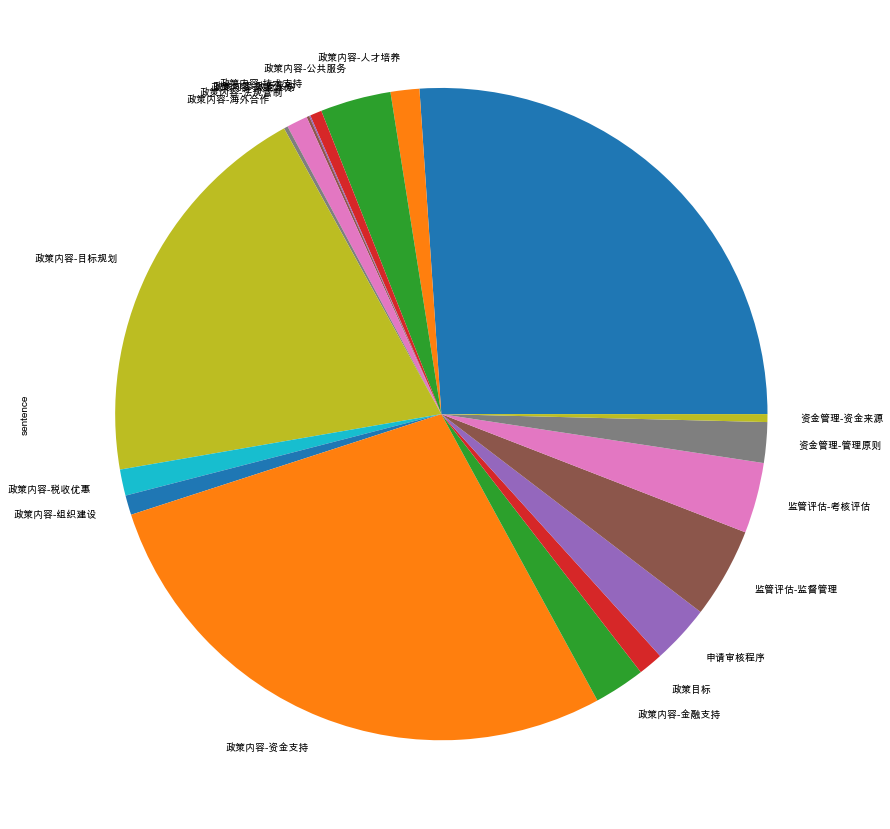

In [15]:
type_count.plot(kind='pie', figsize=(15, 15))

### 句子长度分布

In [10]:
raw_data['sentence_len'] = raw_data['sentence'].apply(len)

In [12]:
max(raw_data['sentence_len'])

389

In [13]:
min(raw_data['sentence_len'])

2

(array([835., 508., 154.,  29.,   8.,   4.,   2.,   1.,   0.,   1.]),
 array([  2. ,  40.7,  79.4, 118.1, 156.8, 195.5, 234.2, 272.9, 311.6,
        350.3, 389. ]),
 <BarContainer object of 10 artists>)

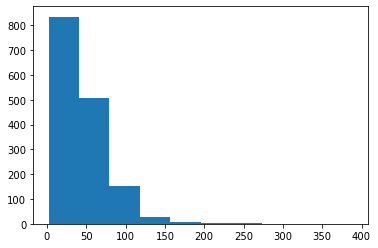

In [15]:
plt.hist(raw_data['sentence_len'])

<AxesSubplot:xlabel='sentence_len', ylabel='Density'>

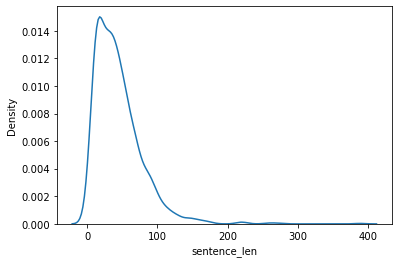

In [17]:
sns.kdeplot(raw_data['sentence_len'])